<div style="background-color: #e9f5f8 ; padding: 40px; border-radius: 10px; color: #191970; text-align: center; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <h1 style="font-size: 48px; font-weight: bold;">IL RISCHIO DI CREDITO:UN'ANALISI PREDITTIVA </h1>

Il dataset di origine simlulativa che andrò ad analizzare riguarda una lista di prestiti richiesti ad istituti di credito. Lo  scopo dell'analisi è cercare di ricondurre il range di caratteristiche di chi accede al ramo creditizio all'esito della procedura di rimborso: capire quindi se dalle caratteristiche del debitore sia possibile dedurre se il prestito erogato sarà rimborsato o meno.

In [ ]:
#installazione librerie necessarie
!pip install pandas==latest_version
!pip install numpy==latest_version
!pip install matplotlib==latest_version
!pip install seaborn==latest_version
!pip install scikit-learn==latest_version
!pip install imbalanced-learn==latest_version
!pip install xgboost==latest_version

In [ ]:
#import librerie e pacchetti necessari
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import  GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc



In [ ]:
# import del dataset
df=pd.read_csv('credit_risk_dataset.csv')

In [ ]:
#sample del dataset
df.head()

<div style="background-color: #e9f5f8 ; padding: 10px; border-radius: 10px; color: #191970; text-align: center; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <h1 style="font-size: 24px;">Descrizione delle variabili</h1>
</div>

<div style="background-color: 	#F0F8FF ; padding: 15px; border-radius: 10px; color: #191970; margin-top: 20px; text-align: left;">
    <ul>
        <li><b>person_age:</b> Età dell’individuo che richiede il prestito.</li>
        <li><b>person_income:</b> Reddito annuale dell’individuo.</li>
        <li><b>person_home_ownership:</b> Tipo di proprietà di casa dell’individuo.
            <ul>
                <li>rent: L'individuo è in affitto.</li>
                <li>mortgage: L’individuo ha un mutuo sulla proprietà che possiede.</li>
                <li>own:  L'individuo detiene la proprietà di casa.</li>
                <li>other: Altre categorie di proprietà di casa che possono essere specifiche per il dataset.</li>
            </ul>
        </li>
        <li><b>person_emp_length:</b> Durata dell’impiego dell’individuo  (in anni).</li>
        <li><b>loan_intent:</b> La motivazione per la richiesta di prestito.</li>
        <li><b>loan_grade:</b> La valutazione assegnata al prestito in base alla solvibilità del mutuatario.
            <ul>
                <li>A: Il mutuatario ha un’elevata solvibilità, che si traduce in un basso rischio.</li>
                <li>B: Il mutuatario è relativamente a basso rischio, ma non così solvibile come nel caso A.</li>
                <li>C: La solvibilità del mutuatario è moderata.</li>
                <li>D: Si considera che il mutuatario abbia un rischio maggiore rispetto ai casi precedenti.</li>
                <li>E: La solvibilità del mutuatario è inferiore, che si traduce in un rischio maggiore.</li>
                <li>F: Il mutuatario rappresenta un notevole rischio di credito.</li>
                <li>G: La solvibilità del mutuatario è la più bassa, portando al rischio più alto.</li>
            </ul>
        </li>
        <li><b>loan_amnt:</b>  L’importo del prestito richiesto dall’individuo.</li>
        <li><b>loan_int_rate:</b> Il tasso di interesse legato al prestito.</li>
        <li><b>loan_status:</b> Stato del prestito, dove 0 indica non inadempimento e 1 indica inadempimento.
            <ul>
                <li>0: Non inadempimento - Il mutuatario ha rimborsato con successo il prestito come concordato, e non c’è stato inadempimento.</li>
                <li>1: Inadempimento - Il mutuatario non è riuscito a rimborsare il prestito secondo i termini concordati e ha inadempiuto al prestito.</li>
            </ul>
        </li>
        <li><b>loan_percent_income:</b> Il rapporto in percentuale tra importo del prestito e il reddito annuale dell'individuo.</li>
        <li><b>cb_person_default_on_file:</b> Storico delle inandempienze dell'individuo secondo le agenzie di credito.
            <ul>
                <li>Y:  L’individuo ha inandempienze nello storico di credito.</li>
                <li>N: L'individuo non ha inandempienze nello storico di credito.</li>
            </ul>
        </li>
        <li><b>cb_preson_cred_hist_length:</b>  La lunghezza dello storico di credito dell’individuo.</li>
    </ul>
</div>


<div style="background-color: #e9f5f8 ; padding: 10px; border-radius: 10px; color: #191970; text-align: center; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <h1 style="font-size: 24px;">EXPLORATORY DATA ANALYSIS</h1>
</div>

In [ ]:
# dimensioni del dataset
df.shape

In [ ]:
#colonne del dataset
df.columns

In [ ]:
# caratteri statistici delle variabili numeriche del dataset
df.describe()

Dalla funzione *describe* già è possibile scorgere alcune informazioni del dataset in questione: escludendo la variabile *loan status* che consideriamo target della nostra analisi, in tutte le features il valore "max" dista più di due scarti quadratici "std" dal 75° percentile, il che denota la presenza di outliers. Le distribuzioni invece verso il basso appaiono più appiattite vista la vicinanza dei valori "min" al 25° percentile (praticamente tutti entro lo scarto quadratico).

Da notare che per le variabili *person_age* e *person_emp_length* i valori "max" rappresentino dei veri e propri refusi vista una presunta età di 144 anni e una carriera lavorativa di 123 anni..

In [ ]:
#tipi delle variabili del dataset
df.info()

In [ ]:
#presenza di elementi nulli
df.isnull().sum()

Due features presentano parecchi valori nulli, toccherà valutare in un secondo momento come trattarli in base alla porzione di dataset che ricoprono.

In [ ]:
# numero di valori assunti da ogni variabile del dataset
df.nunique()

La funzione *nunique* ci mostra il numero di valori assunti da ogni variabile del dataset.

Stampo per ogni feature il rispettivo value_counts per vedere come si distribuiscono le variabili:

In [ ]:
#tabelle di frequenza assoluta delle variabili del dataset
value_counts = {}

for column in df.columns:
    value_counts[column] = df[column].value_counts()

for column, counts in value_counts.items():
    print(f"Feature {column}:")
    print(counts)
    print("\n")   

Il conteggio dei valori assunti dalle modalità delle features conferma che alcune di esse vadano raggruppate in intervalli per una visualizzazione più compatta.

In [ ]:
# riprendo valori minimi, massimi e numero di valori assunti delle variabili in un dataframe
minimi = df.min(numeric_only=True)
massimi = df.max(numeric_only=True)
counts=df.nunique()

df_min_max = pd.DataFrame({'Min': minimi, 'Max': massimi, 'Counts':counts})

df_min_max.sort_values(by='Counts',ascending=False)

Visto che il dataset contiene sia variabili continue che discrete vado a rappresentarle usando diversi grafici.



In [ ]:
numerical_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

# Variabili discrete
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'loan_status', 'cb_person_default_on_file']

# Creazione di grafici per le variabili continue
for feature in numerical_features:
    plt.figure(figsize=(10, 4))

    # Istogramma
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'{feature} histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x=feature)
    plt.title(f'{feature} boxplot')

    plt.tight_layout()
    plt.show()

    



Dalle distribuzioni delle variabili numeriche diventa facile più facile estrarre qualche informazione sul dataset:

- 'person_age': La maggior parte delle persone nel dataset sembra avere tra i 20 ai 30 anni.
- 'person_income': la maggior parte dei redditi si concentra entro i 25000 dollari(?)
- 'person_emp_length': La maggior parte delle persone nel dataset ha una ha una carriera lavorativa compresa tra gli 0 e 20 anni.
- 'loan_amnt': La maggior parte delle persone nel dataset ha preso in prestito un importo inferiore a 10000 dollari.
- 'loan_int_rate': La maggior parte delle persone nel dataset ha un tasso di interesse sui prestiti intorno al 10%.
- 'loan_percent_income': La maggior parte delle persone nel dataset non si espone paricolarmente prendendo prestiti di importo relativamente basso rispetto al proprio reddito.
- 'cb_person_cred_hist_length': La maggior parte delle persone nel dataset ha uno storico di credito che non supera i dieci anni.

I boxplot aiutano a capire se il range dei valori assunti dalle variabili sia dovuto a un effettiva distribuzione uniforme o ad outliers.

Con dei grafici a torta vado a vedere in maniera più precisa come si distribuiscono le modalità delle features categoriche:

In [ ]:
#creazione dizionario con commenti per ogni grafico
commenti = [
     'Dal grafico è facile notare come praticamente 9 persone su 10 che richiedono il prestito sono in affitto o con mutuo pendente sulla propria casa. ',
     'Lo scopo del prestito invece vede un sostanziale equilibrio a leggero discapito di chi lo chiede per apportare migliorie alla casa.',
     '8 prestiti su 10 sono concessi a clienti con solvibilità medio-alta.',
    'Sul totale dei prestiti concessi 8 su 10 sono stati correttamente rimborsati alla banca',
    'Solo una persona richiedente il prestito su 6 ha nel proprio storico insolvenze.']

for feature, commento in zip(categorical_features, commenti):
    
    serie = df[feature].value_counts(normalize=True) * 100
    
    # grafico a torta
    fig, ax = plt.subplots()
    fig.patch.set_facecolor('#FFFFFF')  
    wedges, texts, autotexts = ax.pie(serie, labels = serie.index, autopct='%1.1f%%', pctdistance=0.85, wedgeprops=dict(width=0.3),textprops={'color':'#191970'})
    
    # setto il titolo e la dimensione
    ax.set_title(f'{feature} piechart'.upper(), fontsize=20,color='#191970')
    
    # commento e suo posizionamento
    ax.text(0.5, -0.1, commento, transform=ax.transAxes, fontsize=18, verticalalignment='center', family='serif', ha='center',color='#191970')
    
    
    plt.show()
    

Il dato importante di cui tenere conto nelle fasi di preprocessing è lo sbilanciamento della classe target 'loan_status'.

### Analisi multivariata ###

Il primo step dell'analisi a più variabili è la rappresentazione degli scatterplot a coppie di variabili. In questo caso aggiungo come variabile distintiva dei punti la feature *loan status* che viene considerata la variabile target del dataset.

In [ ]:
sns.pairplot(df,hue='loan_status')


Questa prima rappresentazione ci permette di vedere in quali grafici i punti di diverso colore si collocano in parti idealmente separabili, ciò implica in tali casi che le variabili coinvolte hanno una maggior influenza sull'esito della nostra variabile target.

# <p align=center>![Screenshot 2024-01-07 014724.png](<attachment:Screenshot 2024-01-07 014724.png>)</p>
Per esempio nella riga relativa alla variabile *loan_percent_income* è facile notare in ognuna delle colonne che i punti arancioni - indicanti i prestiti non rimborsati - si collochino nella parte alta del grafico. Questo denota che all'aumentare del rapporto tra l'importo del prestito e il reddito annuo dell'individuo aumenti la possibilità che questo non riesca a saldare il prestito ottenuto. 
Questo trend trova conferma nel grafico sulla diagonale( penultimo riquadro) dove è visibile che oltre un certo 'rapporto' i prestiti insoluti superino quelli rimborsati.

Qualcosa di simile anche se in maniera meno netta si osserva relativamente alla feature *loan_int_rate*, quindi il tasso di interesse è un'altra componente del prestito che all'aumentare riduce le possibilità che esso sia ripagato dal debitore.
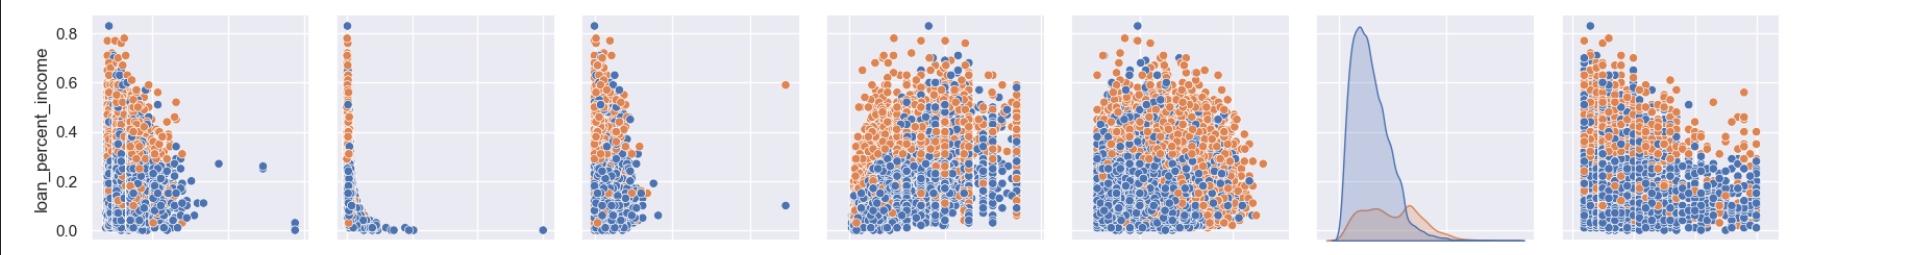

Poi vado a rappresentare la matrice di correlazione tra le variabili numeriche per evidenziare eventuali legami tra di esse:

In [ ]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10,8))
corr =numerical_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.title('Correlation Heatmap of the Numerical Features')
plt.show()

Le uniche coppie che presentano valori di correlazioni significativi sono quelle che legano l'età del richiedente alla lunghezza del suo storico di credito( il che è abbastanza logico ) e quella composta da importo del prestito e la percentuale del reddito dell'individuo che ricopre( anche qui la cosa è ovvia).

### **Esiste quindi un rapporto tra il reddito dell'individuo e l'importo del prestito richiesto?** ###

In [ ]:
#scatterplot tra le due variabili con linea di regressione 
plt.figure(figsize=(10, 6))
sns.regplot(x='person_income', y='loan_amnt', data=df, scatter_kws={'alpha':0.5})
plt.title('Rapporto tra Reddito e Importo del Prestito')
plt.xlabel('Reddito')
plt.ylabel('Importo del Prestito')
plt.show()

Anche se i punti sono molto concentrati la linea di regressione conferma la correlazione positiva tra il reddito e l'importo del prestito.

### Esiste un legame tra la motivazione del prestito e la possibilità che venga rimborsato? ###

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='loan_intent', hue='loan_status', data=df)
plt.title("Loan Status based on Loan Intent")
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.show()

il grafico a barre dà un'indicazione ma per maggiore precisione calcolo il rapporto tra prestiti in default e non per ogni motivo della richiesta:



In [ ]:
grouped = df.groupby(['loan_intent', 'loan_status']).size().unstack()

#creazione valore di rapporto tra loan 1 e loan 0
grouped['ratio'] = (grouped[1] / grouped[0])
#ordinamento decrescente
sorted_ratio = grouped['ratio'].sort_values(ascending=False)

sorted_ratio

La classifica indica che dalla motivazione del prestito si può iniziare a comprendere la possibilità di rimborso. i prestiti richiesti per saldare vecchi debiti sono la categoria più incline al possibile default (4 su 10 prestiti non rimborsati), seguono i prestiti per spese mediche, altra incombenza a volte non prevedibile pertanto non programmabile. Menzione anche per i prestiti per i miglioramenti della casa , che seppur rappresentino la motivazione di gran lunga meno frequente hanno un alto tasso di default.

### Il tasso di interesse concesso determina il rimborso del prestito? ###

Un'altra variabile che l'istituto può controllare in sede di stipula del prestito è il tasso di interesse concesso al richiedente. Può questo influire sulle possibilità del debitore di rimborsare correttamente l'importo erogato?




In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='loan_status', y='loan_int_rate', data=df)
plt.title("Loan Status vs Loan Interest Rate")
plt.xlabel('Loan Status')
plt.ylabel('Loan Interest Rate')
plt.show()

In [ ]:
# tasso di interesse medio per stato del prestito
df.groupby('loan_status')['loan_int_rate'].mean()

Il box-plot è abbastanza chiaro nel "raccontare" che i prestiti non rimborsati abbiano un range di tassi di interesse significativamente diverso da quelli correttamente pagati. Valore confermato con una media di quasi 3 punti percentuali in più per i prestiti in default. Questo conferma che tassi di interesse più alti si leghino a un tasso di inadempimento maggiore.
Bisogna quindi capire a chi vengono concessi tassi di interesse più alti..

### Esiste un rapporto tra tasso di interesse concesso e la porzione del reddito rappresentata dal prestito?

In [ ]:
sns.set(style="darkgrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_percent_income', y='loan_int_rate', hue='loan_status', data=df, alpha=0.7)
plt.title('Loan Percent of Income vs Loan Interest Rate')
plt.xlabel('Loan Percent of Income')
plt.ylabel('Loan Interest Rate (%)')
plt.show()

Lo scatter-plot mette in relazione il tasso di interesse del prestito e che porzione del reddito del richiedente va a coprire. Il grafico mostra chiaramente che oltre un certo rapporto prestito-reddito(circa 0,3) le insolvenze comincino a distribuirsi a prescindere dal tasso di interesse, mentre prima si nota una sorta di "comfort-zone quadrata": con tassi di interesse inferiori al 14% e un rapporto prestito-reddito inferiore al 30% si ha una quasi certezza della restituzione del prestito.

<div style="background-color: #f3faf3; padding: 10px; border-radius: 10px; color: #191970; text-align: center; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <h1 style="font-size: 24px;">FEATURE ENGINEERING</h1>
</div>

Il primo passaggio fondamentale consiste nel trattamento dei valori nulli all'interno del dataset:

In [ ]:
percentuale_nulli = df.isnull().sum() / len(df) * 100
df_nulli = pd.DataFrame({'Feature': df.columns,
                         'percentuale_nulli':  percentuale_nulli.values})
df_nulli

Essi rappresentano percentuali basse delle uniche due variabili dove sono presenti pertanto possono essere rimossi:

In [ ]:
df.dropna(subset=['person_emp_length', 'loan_int_rate'],inplace=True)

In [ ]:
df.isnull().sum()

Successivamente vado a riprendere la distribuzione dell'età dei richiedenti il prestito:

# <p align=left>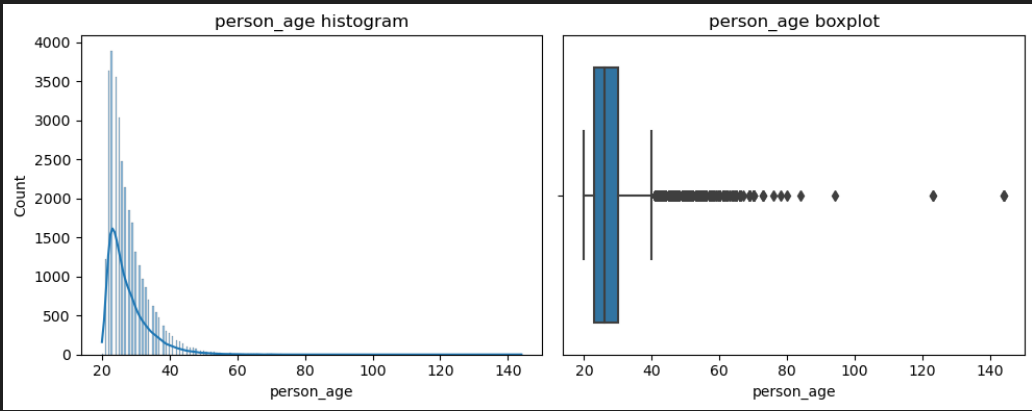</p>

Visto che di fatto oltre gli 80 anni ci sono solo outliers ed errori di compilazione posso rimuovere quegli elementi dal dataset:


In [ ]:
df=df[df.person_age <=80]





Altra variabile sulla quale servono correzioni è la *person_emp_length* che riporta un valore di 123 decisamente errato:

# <p align=left>![personemlength.png](personemlength.png)</p>

valore che andrò a rimuovere:




In [ ]:
df=df[df.person_emp_length <=60]

In [ ]:
#controllo il nuovo valore massimo
df.person_emp_length.max()

Anche la variabile relativa al reddito presenta un valore che seppur plausibile si discosta fortemente dalla distribuzione dei restanti valori:

# <p align=left>![personemlength.png](personincome.png)</p>

pertanto rimuovo anche questo valore:

In [ ]:
df=df[df.person_income<3000000]

In [ ]:
#controllo il nuovo valore massimo
df.person_income.max()

Le restanti variabili numeriche non presentano anomalie pertanto le conservo.



Creo una copia del dataset prima di passare alla fase di preprocessing:

In [ ]:
raw_df=df.copy

<div style="background-color: #f3faf3; padding: 10px; border-radius: 10px; color: #191970; text-align: center; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <h1 style="font-size: 24px;">DATA PREPROCESSING</h1>
</div>

Il dataset contiene sia features numeriche che categoriche. In preprocessing applico la standardizzazione alle prime per averle tutte nella stessa 'scala' di valori. Per le categoriche applico la funzione One-Hot-encoder

In [ ]:
# Divisione colonne in due liste
num_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
cat_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# creazione trasformatori
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# combinazione dei trasformatori
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)])


Posso ora dividere il dataset in variabili dipendenti e variabile target e applicare la combinazione dei trasformatori per i due tipi di variabile:

In [ ]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

X= preprocessor.fit_transform(X)

df.columns = df.columns.to_series().apply(lambda x: x.strip())


In [ ]:
#dimensioni delle due variabili
X.shape,y.shape

In [ ]:
#divido il dataset in parte per l'addestramento e parte di test con stratify visto lo sbilanciamento delle classi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

<div style="background-color: #f3faf3; padding: 10px; border-radius: 10px; color: #191970; text-align: center; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <h1 style="font-size: 24px;">VALUTAZIONE MODELLI</h1>
</div>

Le prime prove sul dataset le faccio testando vari algoritmi adatti alla classificazione binaria e registrando i risultati in un dataframe per un confronto.

In [ ]:
#creo dizionario con algoritmi da testare
algoritmi = {
    'Regressione logistica': LogisticRegression(),
    'Albero di decisione': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}




def test_algorithms(algoritmi, X, y, cv=5):    #funzione che scorre i vari algoritmi con cross validation a 5 fold di default e li testa sui set di dati inseriti
    # Definisco le metriche
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']

    # Risultati da memorizzare
    risultati = {}

    # Testo ogni algoritmo
    for nome, algoritmo in algoritmi.items():
        print(f"Testing {nome}...")
        scores = cross_validate(algoritmo, X, y, cv=cv, scoring=scoring, n_jobs=-1)

        # Memorizzo i risultati 
        risultati[nome] = {
            'accuracy': scores['test_accuracy'].mean(),
            'precision': scores['test_precision_weighted'].mean(),
            'recall': scores['test_recall_weighted'].mean(),
            'f1_score': scores['test_f1_weighted'].mean(),
            'roc_auc': scores['test_roc_auc'].mean()
        }

    # inserisco in un Dataframe i risultati
    df_risultati = pd.DataFrame(risultati).transpose()

    return df_risultati

In [ ]:
#uso la funzione sul set di addestramento
report=test_algorithms(algoritmi,X_train,y_train,cv=10)

In [ ]:
report

Valutando l'accuracy l'algoritmo migliore sembra essere il Random Forest. Ma bisogna tenere conto,vista la natura del problema, di qualche considerazione:
* sarà fortemente importante ridurre i cosiddetti **falsi positivi(FP)**, quei soggetti che vengono classificati come solventi, quindi meritevoli della concessione del credito quando in realtà non ne possiedono i requisiti.Una loro errata classificazione rappresenta un danno finanziario per la banca.

* meno dannoso ma comunque meritevole di attenzione è il corretto riconoscimento dei **falsi negativi(FN)**, coloro che avrebbero i requisiti per poter ottenere il credito ma classificati come inadempienti. Il danno qui è legato al mancato guadagno per la concessione di un credito che sarebbe sicuro e solvibile.

Quando i costi dei falsi positivi sono alti come nel caso in esame la metrica più importante è la **precision** che rileva la percentuale di veri positivi sul totale dei positivi predetti dal modello(veri positivi+ falsi positivi).
La metrica **recall** invece serve per controllare i falsi negativi e si calcola rapportando i TP alla totalità dei casi positivi reali (TP + FN).

​Le due metriche però portano a un trade-off poichè se una aumenta l'altra diminuisce e viceversa.




In [ ]:


def plot_results(df_risultati):
    metrics = ['accuracy', 'precision', 'f1_score']
    palettes = ['Blues_r', 'Greens_r', 'Reds_r']  # Scegli le palette che preferisci

    for metric, palette in zip(metrics, palettes):
        plt.figure(figsize=(10, 6))
        df_sorted = df_risultati.sort_values(by=metric, ascending=False)
        
        plt.barh(df_sorted.index, df_sorted[metric], color=sns.color_palette(palette, len(df_sorted)))
        plt.title(f'Modelli ordinati per {metric}')
        plt.xlabel(metric)

        # Aggiungi l'etichetta del modello e il punteggio per ogni barra
        for i, (model, score) in enumerate(df_sorted[metric].items()):
            plt.text(score, i, f'{score:.2f}', va='center')

        plt.gca().invert_yaxis()  # Inverte l'ordine delle barre

        plt.show()

# Utilizza la funzione

plot_results(report)

I tre algoritmi che ottengono i risultati migliori sono XGBoost,Random Forest e Gradient Boosting . Ho plottato anche la chart secondo la Precision  perchè vista la natura del problema reputo preminente che siano pochi i falsi positivi ed è la metrica che può garantirlo. Per sicurezza anche f1 score(media armonica tra precisione recall) conferma la graduatoria.



<div style="background-color: #f3faf3; padding: 10px; border-radius: 10px; color: #191970; text-align: center; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <h1 style="font-size: 24px;">TUNING DEGLI IPERPARAMETRI</h1>
</div>

Prima di combinare l'azione dei modelli con un metodo ensemble procedo a fare il tuning dei parametri di ognuno di essi, per non appesantire troppo i calcoli uso RandomizeSearchCV e non il più esaustivo ma "pesante" GridSearchCV:

In [ ]:


#creo i dizionari con i parametri di ogni algoritmo scelto

rf_param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8, None],
    'criterion' :['gini', 'entropy'],
}


gb_param_grid = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [3, 4, 5, 6, 7, 8]
}


xgb_params_grid = {
    "n_estimators": np.arange(50, 200, 10),
    "max_depth": np.arange(2, 10, 2),
    "learning_rate": np.linspace(0.01, 0.1, 10),
}

rf_random = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, n_iter=50, cv=5, n_jobs=-1,verbose=3)

# fit del modello
rf_random.fit(X_train, y_train)

# trovo i parametri ottimali
rf_best_params = rf_random.best_params_

# faccio lo stesso  per Gb e Svc
gb_random = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), gb_param_grid, n_iter=50, cv=5, n_jobs=-1,verbose=3)
gb_random.fit(X_train, y_train)
gb_best_params = gb_random.best_params_

xgb_random = RandomizedSearchCV(XGBClassifier(random_state=42), xgb_params_grid, n_iter=50, cv=5, n_jobs=-1,verbose=3)
xgb_random.fit(X_train, y_train)
xgb_best_params = xgb_random.best_params_

# estraggo i parametri ottimali per ciascun modello
print("Random Forest best parameters: ", rf_best_params)
print("Gradient Boosting best parameters: ", gb_best_params)
print("XGB best parameters: ", xgb_best_params)

Una volta ottenuti i **best_params** di ognuno dei tre algoritmi vado creare il mio Voting Classifier settando ognuno dei tre modelli con le impostazioni migliori:

In [ ]:


clf1 = RandomForestClassifier(**rf_best_params)
clf2 = GradientBoostingClassifier(**gb_best_params)
clf3 = XGBClassifier(**xgb_best_params)

# creo oggetto ensemble
eclf = VotingClassifier(
    estimators=[('rf', clf1), ('gb', clf2), ('xgb', clf3)],
    voting='soft'
)

eclf.fit(X_train, y_train)



Una volta fittato il metodo ensemble vado a riapplicare la funzione **test_algorithms** passando stavolta il solo ensemble anzichè la lista di algoritmi. Questo per metterlo nelle stesse condizioni nelle quali ho testato gli altri algoritmi.

In [ ]:
def test_algorithm(nome, modello, X, y, cv=5):
    # Definizione metriche
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']

    risultati = {}

    # Test del modello
    print(f"Testing {nome}...")
    scores = cross_validate(modello, X, y, cv=cv, scoring=scoring, n_jobs=-1)

    # registrazione risultati
    risultati[nome] = {
        'accuracy': scores['test_accuracy'].mean(),
        'precision': scores['test_precision_weighted'].mean(),
        'recall': scores['test_recall_weighted'].mean(),
        'f1_score': scores['test_f1_weighted'].mean(),
        'roc_auc': scores['test_roc_auc'].mean()
    }

    # trasformazione dei risultati in un dataframe
    df_risultato = pd.DataFrame(risultati[nome], index=[nome])
    return df_risultato

    

# Applicazione al modello Ensemble
df_ensemble = test_algorithm('Voting Ensemble', eclf, X_train,y_train,cv=10) 

# Aggiunta dei risultati al dataframe esistente report
df_risultati = pd.concat([report, df_ensemble])



In [ ]:
df_risultati

In [ ]:
df_risultati.style.highlight_max(color = 'blue', axis = 0)

Il metodo Ensemble migliora praticamente tutte le metriche dei modelli precedenti eccetto un trascurabile abbassamento della roc_auc.
Visti i risultati già ottimali non sembra necessario calibrare i parametri in maniera diversa.

<div style="background-color: #f3faf3; padding: 10px; border-radius: 10px; color: #191970; text-align: center; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <h1 style="font-size: 24px;">VALUTAZIONE FINALE DEL MODELLO e CONCLUSIONI</h1>
</div>

Il metodo ensemble si è mostrato ottimo alle prese col set di addestramento. Ora è il momento di valorizzarlo alle prese con la porzione di dataset pulita, quella ancora non utilizzata in nessuna delle fasi precedenti.A tal fine creo una funzione che prenda come parametri il modello, le features di test e il target di test e i risultati del modello sull'addestramento.

La funzione costruirà la matrice di confusione, il classification report, stamperà su un dataframe le metriche calcolate e le confronterà con quelle trovate in fase di addestramento per valutare eventuale overfitting del modello ai dati:

In [ ]:


def evaluate_model(model, X_test, y_test, df_ensemble, model_name):
    # Previsioni
    y_pred = model.predict(X_test)
    y_score = model.predict_proba(X_test)[:,1]
    
    # Calcolo matrice di confusione
    cm = confusion_matrix(y_test, y_pred)
    
    # Generazione heatmap matrice di confusione
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Stampa report di classificazione
    print(classification_report(y_test, y_pred))

    # Calcol di  ROC Curve e AUC
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Visualizzazione ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # metriche
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average='weighted')
    recall = metrics.recall_score(y_test, y_pred, average='weighted')
    f1 = metrics.f1_score(y_test, y_pred, average='weighted')
    
    # Dataframe dei risultati
    df_results = pd.DataFrame({
        'accuracy': [accuracy],
        'precision': [precision],
        'recall': [recall],
        'f1_score': [f1],
        'roc_auc': [roc_auc]
    }, index=[model_name])

    # Unione col vecchio dataset
    df_ensemble_updated = pd.concat([df_ensemble, df_results])
    
    # Grafico a barre 
    df_ensemble_updated.T.plot(kind='bar', figsize=(10,7), color=['skyblue', 'darkblue'])
    plt.title('Confronto tra metriche di train e test')
    plt.ylabel('Valore')
    plt.xlabel('Metriche')
    plt.show()
    
    return df_ensemble_updated

In [ ]:
evaluate_model(eclf,X_test,y_test,df_ensemble,'Voting Ensemble Test')

Il modello mantiene metriche molto buone anche sulla fase di test, migliorando lievemente persino i punteggi ottenuti in addestramento pertanto può essere ritenuto valido.

La parte finale del modello che può dare qualche informazione in più riguarda la cosiddetta **feature importance** , cioè quanto ogni singola variabile pesi sui risultati del nostro modello.

Solitamente il procedimento viene svolto sul singolo algoritmo, quando usiamo metodi ensemble è necessario calcolare la feature importance su ogni singolo modello utilizzato e calcolare una sorta di media dei valori trovati.

Inoltre avendo applicato dei metodi di preprocessing sulle variabili categoriche sarà necessario recuperare queste variabili altrimenti il numero di features non corrisponderebbe col numero di colonne del dataset originario.

In [ ]:
transformers = preprocessor.named_transformers_

# Start with the numeric features
features = list(num_cols)

# Then add the one-hot encoded categorical features
cat_encoder = transformers['cat']['onehot']
cat_one_hot_features = list(cat_encoder.get_feature_names_out(cat_cols))

# Combine
features += cat_one_hot_features

feature_importances = pd.DataFrame()

for name, estimator in eclf.named_estimators_.items():
    if hasattr(estimator, 'feature_importances_'):
        fi = pd.DataFrame({
            'Feature': features,
            'Importance': estimator.feature_importances_,
        })
        fi['Model'] = name
        feature_importances = feature_importances.append(fi)

# Average feature importances across models
average_feature_importances = feature_importances.groupby('Feature')['Importance'].mean().reset_index()

average_feature_importances.sort_values(by='Importance',ascending=False,inplace=True)
average_feature_importances

In [ ]:
average_feature_importances.sort_values(by='Importance', ascending=True, inplace=True)

# setto le dimensioni del grafico
fig, ax = plt.subplots(figsize=(14, 8))

# barplot orizzontale con palette di colori arcobaleno
colors = plt.cm.rainbow(np.linspace(0, 1, len(average_feature_importances)))
plt.barh(average_feature_importances['Feature'], average_feature_importances['Importance'], align='center', color=colors)
plt.xlabel('Relative Importance')
plt.title('Feature Importances')

plt.show()

Il grafico mostra che le prime variabili in ordine di importanza nella predizione del rischio di inadempienza sono:

* **loan_percent_income** : come avevamo già visto in fase di EDA la percentuale del prestito sul reddito individuale è una variabile fortemente significativa per il buon esito del rimborso

* **person_home_ownership_RENT**:la seconda variabile per importanza è una di quelle create col one-hot-encoder,il fatto che chi richiede il prestito sia in affitto chiaramente denota una meno ampia possibilità finanziaria pertanto un maggior rischio di inadempienza

* **loan_int_rate**: anche il tasso di interesse sul prestito già in fase di analisi esplorativa aveva mostrato un buon potere predittivo




 

Queste variabili sono monitorabili in fase di richiesta del prestito pertanto l'istituto può sicuramente porre attenzione su queste caratteristiche del cliente . 

Il dataset analizzato seppur simulativo presentava richieste di prestiti concesse praticamente per metà a persone in affitto, visto l'alto potere predittivo di questa variabile forse sarebbe conveniente diminuire questa percentuale per concentrarsi su profili con una stabilità maggiore.